In [1]:
import pandas as pd
pd.options.display.float_format='{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_raw=train_data.copy()
test_raw=test_data.copy()

In [4]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.00,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.00,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.00,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.00,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.00,2,0,0,73,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
for i in train_data.columns:
    print("\n\n{} Unique values- {}\n\n {}".format(i,train_data[i].nunique(),train_data[i].unique()))



employee_id Unique values- 54808

 [65438 65141  7513 ... 13918 13614 51526]


department Unique values- 9

 ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']


region Unique values- 34

 ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']


education Unique values- 3

 ["Master's & above" "Bachelor's" nan 'Below Secondary']


gender Unique values- 2

 ['f' 'm']


recruitment_channel Unique values- 3

 ['sourcing' 'other' 'referred']


no_of_trainings Unique values- 10

 [ 1  2  3  4  7  5  6  8 10  9]


age Unique values- 41

 [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 4

In [7]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.00,54808.00,54808.00,50684.00,54808.00,54808.00,54808.00,54808.00,54808.00
mean,39195.83,1.25,34.80,3.33,5.87,0.35,0.02,63.39,0.09
std,22586.58,0.61,7.66,1.26,4.27,0.48,0.15,13.37,0.28
min,1.00,1.00,20.00,1.00,1.00,0.00,0.00,39.00,0.00
25%,19669.75,1.00,29.00,3.00,3.00,0.00,0.00,51.00,0.00
50%,39225.50,1.00,33.00,3.00,5.00,0.00,0.00,60.00,0.00
75%,58730.50,1.00,39.00,4.00,7.00,1.00,0.00,76.00,0.00
max,78298.00,10.00,60.00,5.00,37.00,1.00,1.00,99.00,1.00


In [8]:
train_data.describe(include="O")

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


### Target Variable: `is_promoted`

In [9]:

train_data["is_promoted"].value_counts(normalize=True)

0   0.91
1   0.09
Name: is_promoted, dtype: float64

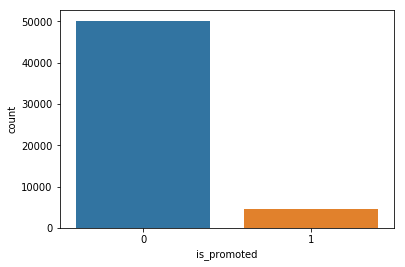

In [10]:
sns.countplot(train_data["is_promoted"]);

Target Variable (is_promoted) is class imbalanced with 91.48% of Data observations as 0 (not promoted) and only 8.517% as 1(promoted)

### Independent Variables:

In [11]:
iv=list(train_data.drop(["is_promoted"],axis=1).columns.values)
print("{} Independent Variables are available as per Dataset:\n\n{}".format(len(iv),iv))

13 Independent Variables are available as per Dataset:

['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']


##### employee_id
employee_id is a unique id and it can be dropped from analysis and to train the model

In [12]:
train_data.drop(["employee_id"],axis=1,inplace=True)

##### Department

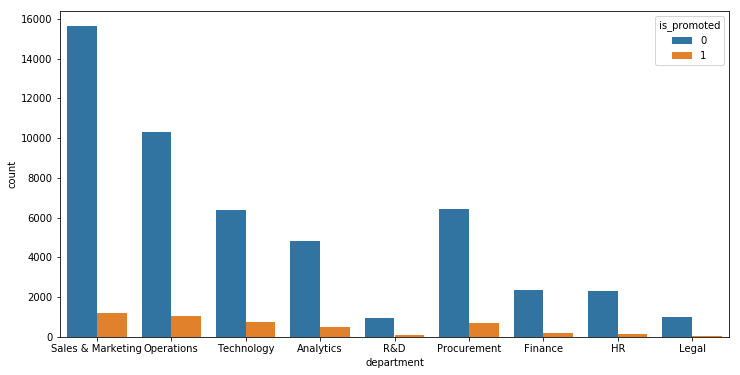

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(train_data["department"],hue=train_data["is_promoted"]);


###### Chi Square Test for Independence:

Used to determine if there is a significant relationship between two nominal categorical variables. the frequency of each category of a nominal variable is compared across frequecny of each category of second nominal variable.The data can be displayed in a contigency table

`Null Hypothesis`: There is no significant relationship between variable 1 and variable 2


`Alternate Hypothesis`: There is a significant relationship between variable 1 and variable 2

Example:


`Null Hypothesis`: There is no significant relationship between gender and empathy


`Alternate Hypothesis`: There is a significant relationship between gender and empathy


In [14]:
department_contigency=train_data[["department","is_promoted"]].pivot_table(index="department",columns="is_promoted",aggfunc=len,fill_value=0)
department_contigency

is_promoted,0,1
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


##### Pearson’s chi-squared test for independence
`Null hypothesis`: Assumes that there is no association between department and is_promoted.

`Alternative hypothesis`: Assumes that there is an association between department and is_promoted.

In [15]:
from scipy import stats
from scipy.stats import chi2_contingency
stat,p,dof,expected=chi2_contingency(department_contigency)
prob=0.95
alpha=1-prob
if p < alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and Department is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and Department is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))


Calucalted Statistic: 151.4263551632387  

P-Value: 9.882497107474632e-29  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and Department is a Significant variable to Predict Target Class with a probability of 100.0%


In [16]:
significant_variables=[]
significant_variables.append("department")

##### Region

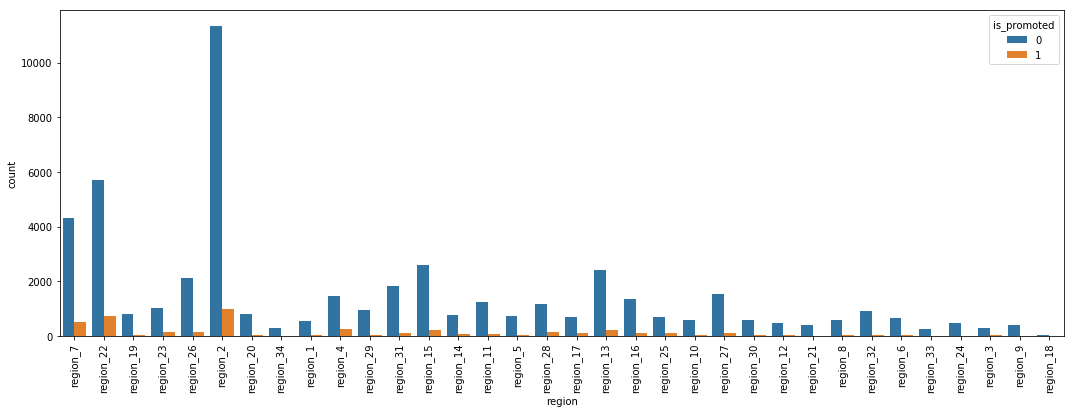

In [17]:
plt.figure(figsize=(18,6))
s=sns.countplot(train_data["region"],hue=train_data["is_promoted"])
plt.setp(s.get_xticklabels(), rotation=90);

In [18]:
region_contigency=train_data[["region","is_promoted"]].pivot_table(index="region",columns="is_promoted",aggfunc=len,fill_value=0)
region_contigency

is_promoted,0,1
region,,
region_1,552,58
region_10,597,51
region_11,1241,74
region_12,467,33
region_13,2418,230
region_14,765,62
region_15,2586,222
region_16,1363,102
region_17,687,109


###### ChiSquare test of Independence

`Null Hypothesis`: There is no significant relation between Region and is_promote

`Alternate Hypothesis`: There is a significant relation between Region and is_promote

In [19]:
stat,p,dof,expected=chi2_contingency(region_contigency)
prob=0.95
alpha=1-prob
if p<alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and region is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and region is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))


Calucalted Statistic: 475.6402377579206  

P-Value: 7.275378205784026e-80  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and region is a Significant variable to Predict Target Class with a probability of 100.0%


In [20]:
significant_variables.append("region")

##### Education

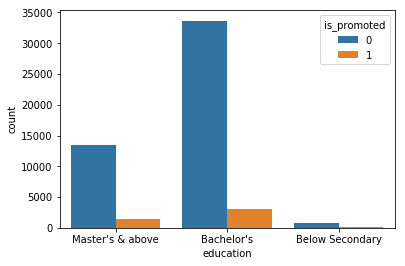

In [21]:
sns.countplot(train_data["education"],hue=train_data["is_promoted"]);

In [22]:
education_contigency=train_data[["education","is_promoted"]].pivot_table(index="education",columns="is_promoted",aggfunc=len,fill_value=0)
education_contigency

is_promoted,0,1
education,,
Bachelor's,33661,3008
Below Secondary,738,67
Master's & above,13454,1471


In [23]:
stat,p,dof,expected=chi2_contingency(education_contigency)
prob=0.95
alpha=1-prob
if p<alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and education is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and education is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))


Calucalted Statistic: 36.70295913519633  

P-Value: 1.0716517784616584e-08  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and education is a Significant variable to Predict Target Class with a probability of 99.99999892834822%


In [24]:
significant_variables.append("education")

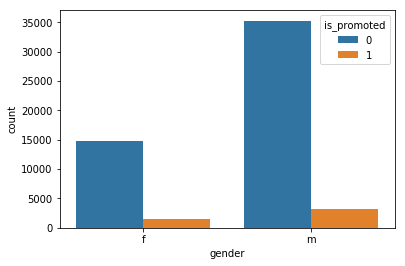

In [25]:
sns.countplot(train_data["gender"],hue=train_data["is_promoted"]);

In [26]:
gender_contigency=train_data[["gender","is_promoted"]].pivot_table(index="gender",columns="is_promoted",aggfunc=len,fill_value=0)
gender_contigency

is_promoted,0,1
gender,,
f,14845,1467
m,35295,3201


In [27]:
stat,p,dof,expected=chi2_contingency(gender_contigency)
prob=0.95
alpha=1-prob
if p<alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and gender is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and gender is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))


Calucalted Statistic: 6.677254566546107  

P-Value: 0.009765091521176657  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and gender is a Significant variable to Predict Target Class with a probability of 99.02349084788233%


In [28]:
significant_variables.append("gender")

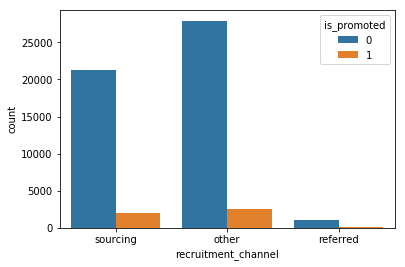

In [29]:
sns.countplot(train_data["recruitment_channel"],hue=train_data["is_promoted"]);

In [30]:
recruitment_contigency=train_data[["recruitment_channel","is_promoted"]].pivot_table(index="recruitment_channel",columns="is_promoted",aggfunc=len,fill_value=0)
recruitment_contigency

is_promoted,0,1
recruitment_channel,,
other,27890,2556
referred,1004,138
sourcing,21246,1974


In [31]:
stat,p,dof,expected=chi2_contingency(region_contigency)
prob=0.95
alpha=1-prob
if p<alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and Recruitment Channel is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and Recruitment Channel is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))

    

Calucalted Statistic: 475.6402377579206  

P-Value: 7.275378205784026e-80  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and Recruitment Channel is a Significant variable to Predict Target Class with a probability of 100.0%


In [32]:
significant_variables.append("recruitment_channel")

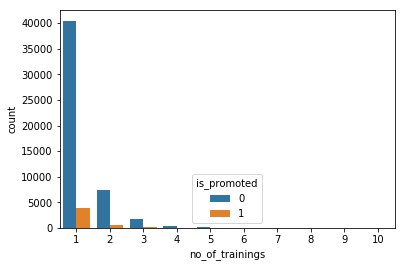

In [33]:
sns.countplot(train_data["no_of_trainings"],hue=train_data["is_promoted"]);

In [34]:
training_contigency=train_data[["no_of_trainings","is_promoted"]].pivot_table(index="no_of_trainings",columns="is_promoted",aggfunc=len,fill_value=0)
training_contigency

is_promoted,0,1
no_of_trainings,,
1,40468,3910
2,7382,605
3,1654,122
4,442,26
5,125,3
6,42,2
7,12,0
8,5,0
9,5,0


In [35]:
stat,p,dof,expected=chi2_contingency(training_contigency)
prob=0.95
alpha=1-prob
if p<alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and Number of Trainings is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and Number of Trainings is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))

    

Calucalted Statistic: 35.132401310728966  

P-Value: 5.6462682173663955e-05  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and Number of Trainings is a Significant variable to Predict Target Class with a probability of 99.99435373178264%


In [36]:
significant_variables.append("is_promoted")

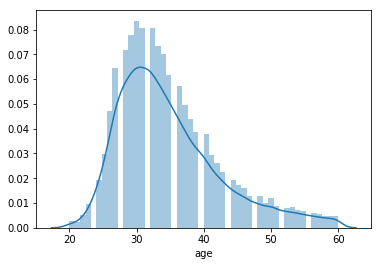

In [37]:
sns.distplot(train_data["age"]);

Average Age for Promoted: 34.372964867180805 
Average age for Not-promoted: 34.84403669724771 
 



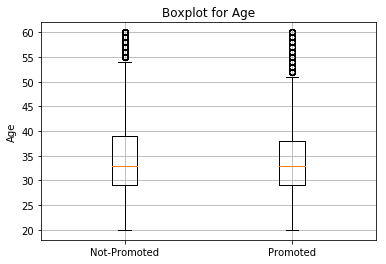

In [38]:
np_age=train_data[train_data["is_promoted"]==0]["age"].values
p_age=train_data[train_data["is_promoted"]==1]["age"].values
print("Average Age for Promoted: {} \nAverage age for Not-promoted: {} \n \n".format(p_age.mean(),np_age.mean()))
plt.title("Boxplot for Age")
plt.boxplot([np_age,p_age])
plt.xticks([1,2],("Not-Promoted","Promoted"))
plt.ylabel('Age')
plt.grid()
plt.show()

#### Z-Test:  whether mean of two groups are statistically different
`Null hypothesis`: There is no Significant difference between Means of age between Promoted and not promoted


`Alternative hypothesis`: There is Significant difference between Means of age between Promoted and not promoted

In [39]:
from statsmodels.stats import weightstats as stests

In [40]:
ztest,pval=stests.ztest(x1=np_age,x2=p_age,value=0,alternative="two-sided")
prob=0.95
alpha=1-prob
if pval<alpha:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and there is Significant difference between Means of age between Promoted and not promoted  with a probability of {}%".format((1-pval)*100))
else:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Failed to reject Null Hypothesis and there is no significant difference between Means of age between Promoted and not promoted  with a probability of {}%".format((1-pval)*100))

Caluclated Statistic: 4.019244411838588  

P-Value: 5.838507987333087e-05  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and there is Significant difference between Means of age between Promoted and not promoted  with a probability of 99.99416149201267%


In [41]:
significant_variables.append("age")

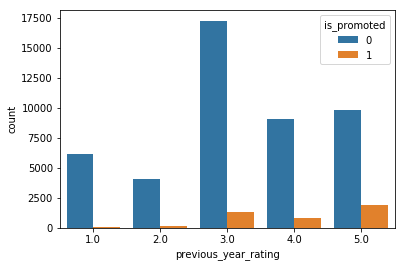

In [42]:
sns.countplot(train_data["previous_year_rating"],hue=train_data["is_promoted"]);

In [43]:
rating_contigency=train_data[["previous_year_rating","is_promoted"]].pivot_table(index="previous_year_rating",columns="is_promoted",aggfunc=len,fill_value=0)
rating_contigency

is_promoted,0,1
previous_year_rating,,
1.00,6135,88
2.00,4044,181
3.00,17263,1355
4.00,9093,784
5.00,9820,1921


In [44]:
stat,p,dof,expected=chi2_contingency(rating_contigency)
prob=0.95
alpha=1-prob
if p<alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and Previous Rating is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and Previous Rating is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))

    

Calucalted Statistic: 1464.50937816034  

P-Value: 0.0  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and Previous Rating is a Significant variable to Predict Target Class with a probability of 100.0%


In [45]:
significant_variables.append("previous_year_rating")

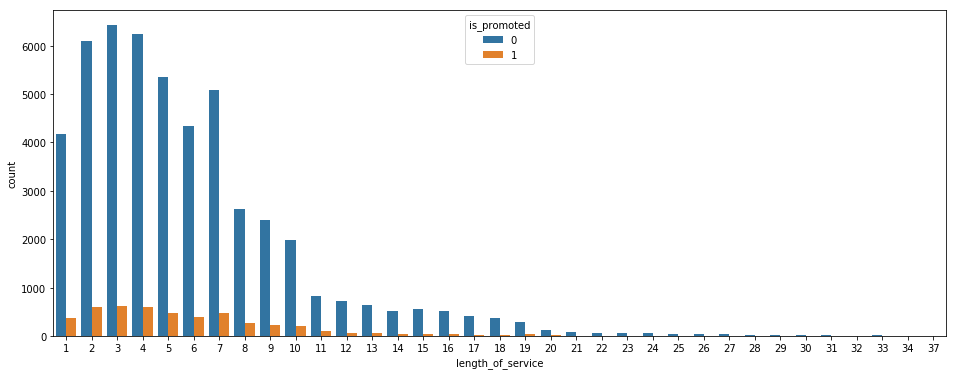

In [46]:
plt.figure(figsize=(16,6))
sns.countplot(train_data["length_of_service"],hue=train_data["is_promoted"]);

In [47]:
exp_contigency=train_data[["length_of_service","is_promoted"]].pivot_table(index="length_of_service",columns="is_promoted",aggfunc=len,fill_value=0)
exp_contigency

is_promoted,0,1
length_of_service,,
1,4170,377
2,6089,595
3,6424,609
4,6238,598
5,5357,475
6,4333,401
7,5087,464
8,2614,269
9,2400,229


In [48]:
stat,p,dof,expected=chi2_contingency(exp_contigency)
prob=0.95
alpha=1-prob
if p<alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and length_of_service is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and length_of_service is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))

    

Calucalted Statistic: 50.98510181681902  

P-Value: 0.030778994503083953  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and length_of_service is a Significant variable to Predict Target Class with a probability of 96.9221005496916%


In [49]:
significant_variables.append("length_of_service")

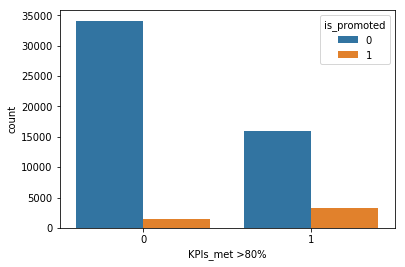

In [50]:
sns.countplot(train_data["KPIs_met >80%"],hue=train_data["is_promoted"]);

In [51]:
kpi_contigency=train_data[["KPIs_met >80%","is_promoted"]].pivot_table(index="KPIs_met >80%",columns="is_promoted",aggfunc=len,fill_value=0)
kpi_contigency

is_promoted,0,1
KPIs_met >80%,,
0,34111,1406
1,16029,3262


In [52]:
stat,p,dof,expected=chi2_contingency(kpi_contigency)
prob=0.95
alpha=1-prob
if p<alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and KPIs_met >80% is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and KPIs_met >80% is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))

    

Calucalted Statistic: 2689.3220548467057  

P-Value: 0.0  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and KPIs_met >80% is a Significant variable to Predict Target Class with a probability of 100.0%


In [53]:
significant_variables.append("KPIs_met >80%")

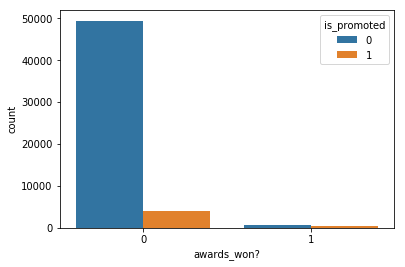

In [54]:
sns.countplot(train_data["awards_won?"],hue=train_data["is_promoted"]);

In [55]:
awards_contigency=train_data[["awards_won?","is_promoted"]].pivot_table(index="awards_won?",columns="is_promoted",aggfunc=len,fill_value=0)
awards_contigency

is_promoted,0,1
awards_won?,,
0,49429,4109
1,711,559


In [56]:
stat,p,dof,expected=chi2_contingency(awards_contigency)
prob=0.95
alpha=1-prob
if p<alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and awards_won? is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and awards_won? is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))

    

Calucalted Statistic: 2098.0719210465427  

P-Value: 0.0  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and awards_won? is a Significant variable to Predict Target Class with a probability of 100.0%


In [57]:
significant_variables.append("awards_won?")

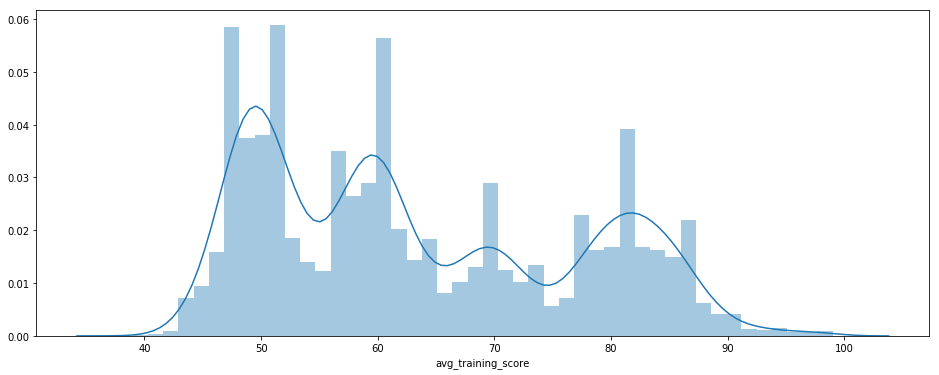

In [58]:
plt.figure(figsize=(16,6))
sns.distplot(train_data["avg_training_score"]);

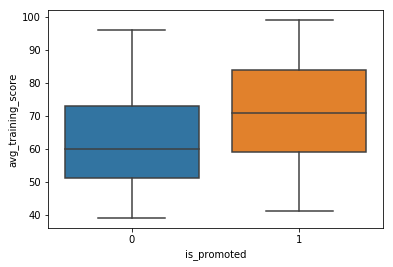

In [59]:
sns.boxplot(y=train_data["avg_training_score"],x=train_data["is_promoted"]);

In [110]:
print(train_data.groupby(["region","department","is_promoted"])["avg_training_score"].mean())
print(train_data.groupby("is_promoted")["avg_training_score"].mean())

region     department         is_promoted
region_1   Analytics          0             84.82
                              1             85.40
           Finance            0             59.33
                              1             59.00
           HR                 0             49.17
                              1             93.00
           Legal              0             63.00
           Operations         0             59.67
                              1             66.33
           Procurement        0             69.83
           Sales & Marketing  0             49.90
                              1             60.44
           Technology         0             79.23
                              1             83.86
region_10  Analytics          0             84.87
                              1             86.67
           Finance            0             59.62
           HR                 0             50.62
                              1             50.00
        

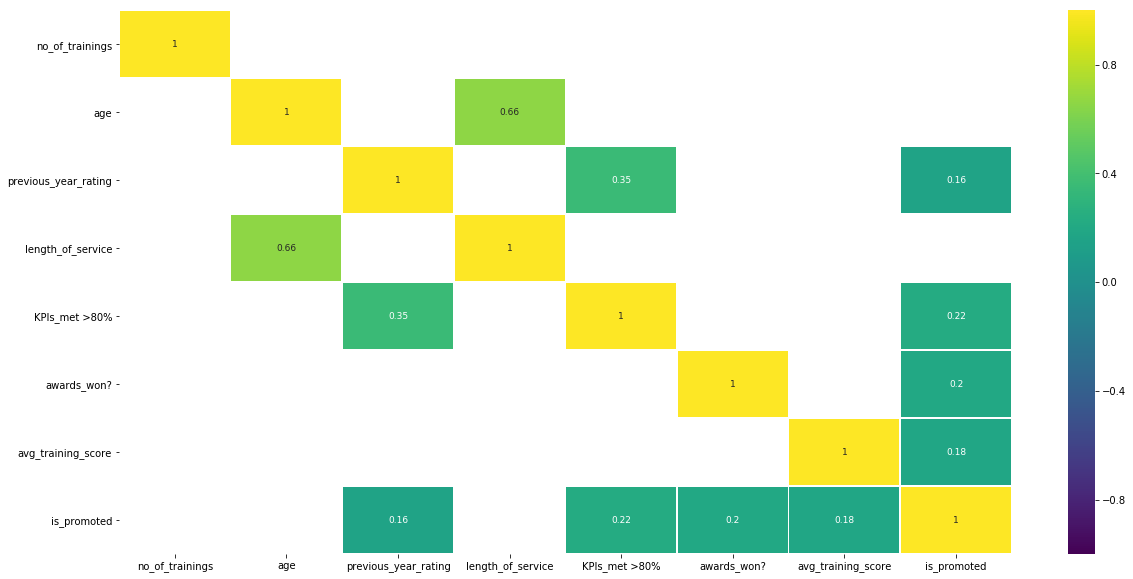

In [60]:
var_corr=train_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(var_corr[(var_corr>=0.1)|(var_corr<=-0.1)],annot=True,cmap="viridis",annot_kws={"size":9},linewidths=0.6,vmax=1.0,vmin=-1.0);

#### Missing Values check

In [61]:
def missing_value_check(train_data):
    missing_count=train_data.isnull().sum().sort_values(ascending=False)
    missing_percent=(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
    missing_check=pd.concat([missing_count,missing_percent],axis=1,keys=["Missing_Count","Missing Percentage"])
    return missing_check

In [62]:
missing_value_check(train_data)

,Missing_Count,Missing Percentage
previous_year_rating,4124,0.08
education,2409,0.04
is_promoted,0,0.00
avg_training_score,0,0.00
awards_won?,0,0.00
KPIs_met >80%,0,0.00
length_of_service,0,0.00
age,0,0.00
no_of_trainings,0,0.00
recruitment_channel,0,0.00


In [63]:
train_data["education"].replace(np.nan,"Bachelor's",inplace=True)

In [64]:
train_data["previous_year_rating"].replace(np.nan,3.0,inplace=True)

In [65]:
category_train=train_data.select_dtypes(include="O")


In [66]:
category_train.drop(["education"],axis=1,inplace=True)

In [67]:
train_data.replace({"education":{"Master's & above":3, "Bachelor's":2, 'Below Secondary':1}},inplace=True)

In [68]:
category_columns=list(category_train.columns)

In [69]:
train_dummies=pd.get_dummies(category_train,drop_first=True)

In [70]:
train_num=train_data.drop(category_columns,axis=1)

In [71]:
train_new=pd.concat([train_num,train_dummies],axis=1)

In [72]:
x=train_new.drop(["is_promoted"],axis=1)
y=train_new["is_promoted"]

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)


In [74]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix

In [75]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
DT_pr=DT.predict(x_test)
pd.crosstab(y_test,DT_pr)

col_0,0,1
is_promoted,,
0,14140,843
1,793,667


In [77]:
f1_score(y_test,DT_pr)

0.4491582491582492

##### Evaluation Data

In [78]:
test_data.head()
test_data.drop(["employee_id"],axis=1,inplace=True)

In [79]:
missing_value_check(test_data)

,Missing_Count,Missing Percentage
previous_year_rating,1812,0.08
education,1034,0.04
avg_training_score,0,0.00
awards_won?,0,0.00
KPIs_met >80%,0,0.00
length_of_service,0,0.00
age,0,0.00
no_of_trainings,0,0.00
recruitment_channel,0,0.00
gender,0,0.00


In [80]:
test_data["previous_year_rating"].replace(np.nan,3.0,inplace=True)

In [81]:
test_data["education"].replace(np.nan,"Bachelor's",inplace=True)

In [82]:
missing_value_check(test_data)

,Missing_Count,Missing Percentage
avg_training_score,0,0.00
awards_won?,0,0.00
KPIs_met >80%,0,0.00
length_of_service,0,0.00
previous_year_rating,0,0.00
age,0,0.00
no_of_trainings,0,0.00
recruitment_channel,0,0.00
gender,0,0.00
education,0,0.00


In [83]:
test_data.replace({"education":{"Master's & above":3, "Bachelor's":2, 'Below Secondary':1}},inplace=True)


In [84]:
test_cat=test_raw[category_columns]
test_dummy=pd.get_dummies(test_cat,drop_first=True)
test_num=test_data.drop(category_columns,axis=1)
test_new=pd.concat([test_num,test_dummy],axis=1)
test_predict=DT.predict(test_new)
employee_id=test_raw["employee_id"]
sub=pd.DataFrame({"employee_id":employee_id,"is_promoted":test_predict},index=None)
sub.to_csv("submission_DT.csv",index=None)

###### Evaluation Score: `0.4133251080`

#### Hyperparameter Tuning for Decision Trees

In [85]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV,KFold,cross_val_score,GridSearchCV

DTh=DecisionTreeClassifier(random_state=21)

params={"max_features":['auto','sqrt', 'log2'],"min_samples_split":[2,3,4,  5,  6,  7,  8,  9, 10, 11, 12, 13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,26,27,28,29,30,50,70,100,150],"min_samples_leaf":[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,14, 15,20,25]}

DT_grid=RandomizedSearchCV(DTh,param_distributions=params,cv=5,n_jobs=-1,scoring="f1",n_iter=500)

DT_grid.fit(x_train,y_train)
print("Best F1 score : %f using %s" % (DT_grid.best_score_, DT_grid.best_params_))




Best F1 score : 0.355269 using {'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [86]:
DT=DecisionTreeClassifier(min_samples_split= 28, min_samples_leaf= 1, max_features= 'auto',random_state=102)
DT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=28,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=102, splitter='best')

In [87]:
f1_score(y_test,DT.predict(x_test))

0.37593984962406013

In [88]:
test_predict=DT.predict(test_new)
employee_id=test_raw["employee_id"]
sub=pd.DataFrame({"employee_id":employee_id,"is_promoted":test_predict},index=None)
sub.to_csv("submission_DT.csv",index=None)

#### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=121,bootstrap=True)
rf.fit(x_train,y_train)
f1_score(y_test,rf.predict(x_test))

0.4080604534005038

In [92]:
test_predict=rf.predict(test_new)
employee_id=test_raw["employee_id"]
sub=pd.DataFrame({"employee_id":employee_id,"is_promoted":test_predict},index=None)
sub.to_csv("submission_rf.csv",index=None)

Evaluation score: 0.355

#### Random Forest hyper parameter tuning

In [94]:
n_estimators=[100,400,500,600,900]
max_depth = np.linspace(1, 32, 32, endpoint=True)
min_samples_split = [2,5,10,15,16,17,18,19,20,21,22,23,24,25,30,50,60]
min_samples_leaf = [2,3,4,5,6,7,8,9,10,15,20,25,30]
max_features = ['auto','sqrt', 'log2']
rf_params=dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
grid=RandomizedSearchCV(rf,param_distributions=rf_params,scoring="f1",n_jobs=-1,cv=5)
grid.fit(x_train,y_train)
print("Best F1 score : %f using %s" % (grid.best_score_, grid.best_params_))


Best F1 score : 0.295721 using {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 18.0}


In [96]:
rf=RandomForestClassifier(random_state=121,bootstrap=True,n_estimators= 500, min_samples_split= 15, min_samples_leaf= 2, max_features= "auto", max_depth= 18.0)
rf.fit(x_train,y_train)
f1_score(y_test,rf.predict(x_test))

0.32518476407049457

In [97]:
test_predict=rf.predict(test_new)
employee_id=test_raw["employee_id"]
sub=pd.DataFrame({"employee_id":employee_id,"is_promoted":test_predict},index=None)
sub.to_csv("submission_rf.csv",index=None)

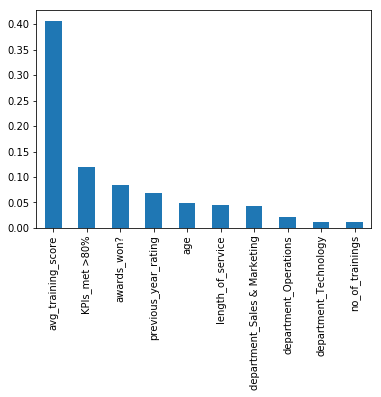

In [98]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='bar');

#### XGB

In [87]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV,KFold,cross_val_score,GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
f1_score(y_test,xgb.predict(x_test))

0.40584415584415595

In [88]:
param_xgb = {
 'max_depth':[5,10,15,20,22,25,28,30,32,25],
 'min_child_weight':[2,3,4,5,6,7,8,9,10,15,20],
'gamma':[0.0, 0.1, 0.2, 0.3, 0.4,0.5],
'subsample':[0.5,0.6, 0.7, 0.8, 0.9,1],
'colsample_bytree':[0.5,0.6, 0.7, 0.8, 0.9,1],
'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05,0.1,0.2,0.5,1,1.5,2,2.5,3],
'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10],
'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05,0.1,0.2,0.5,1,1.5,2,2.5,3]
    
}

xgb=XGBClassifier(n_estimators=500,objective= 'binary:logistic',class_weight="balanced",nthread=4,seed=123)
cv = StratifiedKFold(y_train, n_folds=8,shuffle=True, random_state=30)
xgrid=RandomizedSearchCV(xgb,param_distributions=param_xgb,scoring="f1",n_jobs=-1,cv=cv)

xgrid.fit(x_train,y_train)

print("Best F1 score : %f using %s" % (xgrid.best_score_,xgrid.best_params_))


Best F1 score : 0.489998 using {'subsample': 1, 'scale_pos_weight': 1, 'reg_alpha': 0.5, 'min_child_weight': 15, 'max_depth': 5, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [89]:
xgb=XGBClassifier(subsample= 0.7, scale_pos_weight= 1, reg_alpha= 1.5, min_child_weight= 6, max_depth= 20, gamma= 0.5, colsample_bytree= 0.5,n_estimators=500,objective= 'binary:logistic',class_weight="balanced",nthread=4,seed=123)
xgb.fit(x_train,y_train)
f1_score(y_test,xgb.predict(x_test))

0.5288326300984529

In [99]:
cv = StratifiedKFold(n_splits=8,shuffle=True, random_state=30)
result=cross_val_score(xgb,x_train,y_train,scoring="f1",n_jobs=-1,cv=cv)
print(result)

[0.42628774 0.5060241  0.49241147 0.48180243 0.51602024 0.48526863
 0.4982699  0.5107084 ]


In [104]:
test_predict=xgb.predict(test_new)
employee_id=test_raw["employee_id"]
sub=pd.DataFrame({"employee_id":employee_id,"is_promoted":test_predict},index=None)
sub.to_csv("submission_rf.csv",index=None)

Evaluation Score: `0.4858156028`

In [114]:
from bayes_opt import BayesianOptimization

